# Asymptotic Analysis with: Big-Oh, Big-$ \Omega $, & Big-$ \Theta $

## Comparing Growth Rates

These are the seven fundemental functions used in algorithm analysis.

|Constant|Logarithm|Linear|nlogn   |Quadratic|Cubic|Exponential|
|--------|---------|------|--------|---------|-----|-----------|
|$1$     |$logn$ |$n$   |$nlogn$   |$n^2$    |$n^3$|$a^n$      |

* Data structure operations ideally should run in times proportional to the *constant* or *logarithm* function.

* Algorithms should run in linear or *nlogn* time.

* Algorithms with *quadratic* and *cubic* run times are much less practical.

* Algorithms with *exponential* run times are mostly infeasible for all but the smallest input sizes.

Note (1): $n$ is the number of elements

Note (2): $logn$ will always be assumed to have a base of $2$

Note (3): Assume $a > 1$

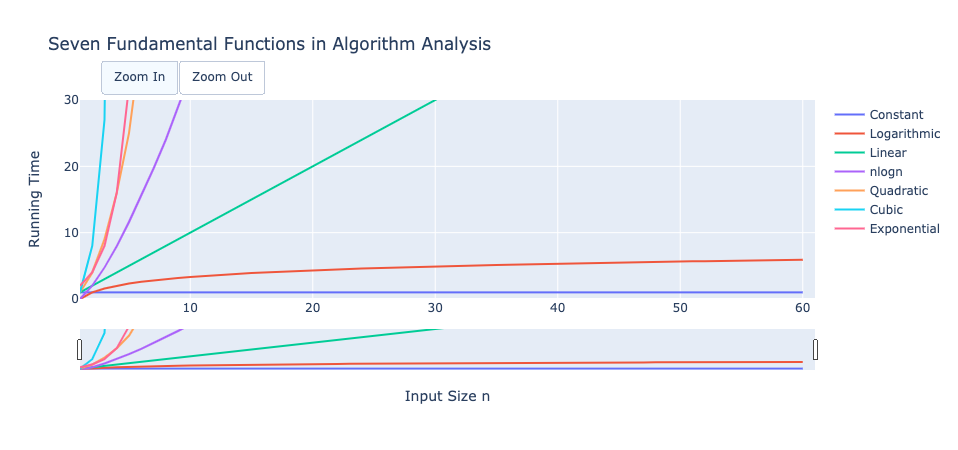

In [5]:
import plotly.graph_objects as go
import numpy as np

n = np.arange(1, 61, 1)
growth_dict = {
    'Constant': np.ones(n.shape),
    'Logarithmic': np.log2(n),
    'Linear': n,
    'nlogn': n*np.log2(n),
    'Quadratic': n**2,
    'Cubic': n**3,
    'Exponential': 2**n    # Here a = 2
}

labels = list(growth_dict.keys())
functions = list(growth_dict.values())

# Create figure
fig = go.Figure()
    
for i in range(len(labels)):
    fig.add_trace(go.Scatter(x=n, y=functions[i], name=labels[i], mode="lines"))
              
fig.update_layout(
    title_text="Seven Fundamental Functions in Algorithm Analysis",
    xaxis=dict(title="Input Size n", rangeslider=dict(visible=True), range=[1, 61]),
    yaxis=dict(title="Running Time", range=[0, 30])
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.25,
            y=1.2,
            buttons=list([
                dict(label="Zoom In",
                     method="update",
                     args=[{"visible": True},
                           {"yaxis": dict(range=[0, 30], title="Running Time")}]),
                dict(label="Zoom Out", # Zoom out to see how bad exponential running time is 
                     method="update",
                     args=[{"visible": True},
                           {"yaxis": dict(range=[0, 3000], title="Running Time")}])
            ]),
        )
    ]
)

fig.show()

## Big-Oh

Let $f(n)$ and $g(n)$ be functions mapping positive integers to positive real numbers.

We say $f(n)$ $\epsilon$ $O(g(n))$ if there is a real constant $c > 0$ and an integer constant $n_0 \geq 1$ such that:

$f(n) \leq cg(n)$, for all $n \geq n_0$

Note (4): $\epsilon$ means "*belongs to*"

Note (5): $n_0$ is the point where $g(n)$ overtakes $f(n)$ 

This is often referred to as Big-Oh notation and is sometimes pronounced as $f(n)$ is Big-Oh of $g(n)$ as opposed to $f(n)$ belongs to Big-Oh of g(n) 

Remember Big-Oh is an ***UPPER BOUND***

### Big-Oh Plot Example

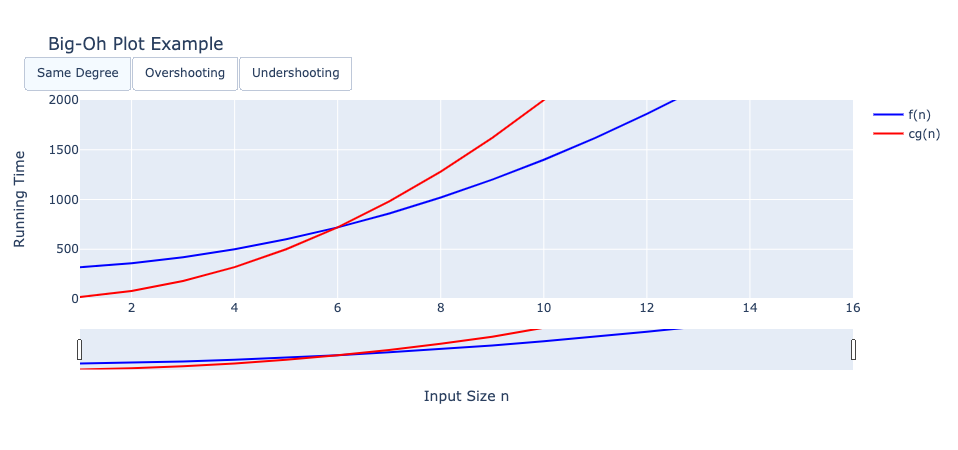

In [10]:
n = np.arange(1, 16, 1)

big_o_dict= {
    'f(n)': 10*n**2 + 10*n + 300,
    'cg(n)': 20*n**2, # Same degree
    'ch(n)': 4*(n**3 + 0.25*n + 60), # Overshooting
    'ck(n)': 500*np.log2(n), # Undershooting
}

labels = list(big_o_dict.keys())
functions = list(big_o_dict.values())
colors = ["blue", "red", "green", "purple"]
initialVisibility = [True, True, False, False]

# Create figure
fig = go.Figure()
    
for i in range(len(labels)):
    fig.add_trace(go.Scatter(x=n, y=functions[i], name=labels[i], line=dict(color=colors[i]), visible=initialVisibility[i], mode="lines"))
              
fig.update_layout(
    title_text="Big-Oh Plot Example",
    xaxis=dict(title="Input Size n", rangeslider=dict(visible=True), range=[1, 16]),
    yaxis=dict(title="Running Time", range=[0, 2000])
)

fig.layout.update(
   updatemenus = [
      go.layout.Updatemenu(
         type = "buttons", direction = "right", active = 0, x = 0.35, y = 1.22,
         buttons = list(
            [
               dict(
                  label = "Same Degree", method = "restyle",
                  args = [{"visible": [True, True, False, False]}]
               ),
               dict(
                  label = "Overshooting", method = "restyle", 
                  args = [{"visible": [True, False, True, False]}]
               ),
               dict(
                  label = "Undershooting", method = "restyle", 
                  args = [{"visible": [True, False, False, True]}]
               )
            ]
         )
      )
   ]
)

fig.show()

#### Same Degree 

* When $f(n)$ and $g(n)$ are the same degree polynomial, e.g., when $f(n) = 10n^2 + 10n + 300$ and $cg(n) = 20n^2$ the function $f(n)$ is $O(g(n))$ since $f(n) \leq cg(n)$ for all $n \geq n_0$.

#### Overshooting

* When $f(n) = 10n^2 + 10n + 300$ and $ch(n) = 4(n^3 + 0.25n + 60)$ the function $f(n)$ is $O(h(n))$ since $f(n) \leq ch(n)$ for all $n \geq n_0$. This example also demonstrates overshooting because $h(n)$ has a much higher growth rate than $f(n)$. 

#### Undershooting

* When $f(n) = 10n^2 + 10n + 300$ and $ck(n) = 500logn$ the function $f(n)$ is not $O(k(n))$ since $f(n) \nleq ck(n)$ for all $n \geq n_0$. This example demonstrates undershooting because $k(n)$ when multiplied by a real constant $c > 0$ is not greater than or equal to $f(n)$ for all $n \geq n_0$.

## Characterizing Functions in Simplest Terms Possible

* It is good practice to use Big-Oh notation to characterize a function as closely as possible. 
You could say that the function $f(n) = 5n^3 + 7n$ is $O(n^4)$, $O(n^6)$, or even $O(n^{100})$. 
But we can choose a $c$ of $20$ and $g(n) = n^3$ which will ensure we grow faster since $5n^3 + 7n \leq 20n^3$ for all $n \geq n_0$
So, it is more accurate to say $f(n)$ is $O(n^3)$. (But nothing is forcing you to do this this is where Big-$\Theta$ comes in.)

* Why do we drop the constant $c$? 
We drop the constant because it was arbritrary (as long as the $c$ leads to $g(n)$ overtaking $f(n)$). We could have used $c = 21, 22, 23, 100$, etc... 
So it isn't necessary to include the constant because we care about modeling behavior.

## Implications of Ignoring Lower-Order Terms & Constant Factors

* As long as we can find a $c$ that overcomes the original function then all of the lower-order terms can be dropped as well as the constant factors. This is because Big-Oh allows us to focus on the term that has the largest impact on the growth of the function.

* We should be aware of the size of the constant factors we're ignoring though because if we have a function like $q(n) = 10^{100}n$ which has a running time of $O(n)$ and another function like $r(n) = 10nlogn$ which has a running time of $O(nlogn)$ even though $q(n)$ is asymptotically faster than $r(n)$ the large constant factor of $10^{100}$ will cause $q(n)$ to have a slower running time than $r(n)$ until $n$ becomes very large, so for practical purposes we would prefer $r(n)$ to $q(n)$ in this case.

* In practice however we'll never be dealing with constants as large as $10^{100}$, but we should be aware of the consequences of ignoring constant factors especially large constant factors.

## Big-$ \Omega $

Let $f(n)$ and $g(n)$ be functions mapping positive integers to positive real numbers.

We say $f(n)$ $\epsilon$ $\Omega(g(n))$ if there is a real constant $c > 0$ and an integer constant $n_0 \geq 1$ such that:

$f(n) \geq cg(n)$, for all $n \geq n_0$

Remember Big-$\Omega$ is a ***LOWER BOUND***

### Big-$\Omega$ Plot Example

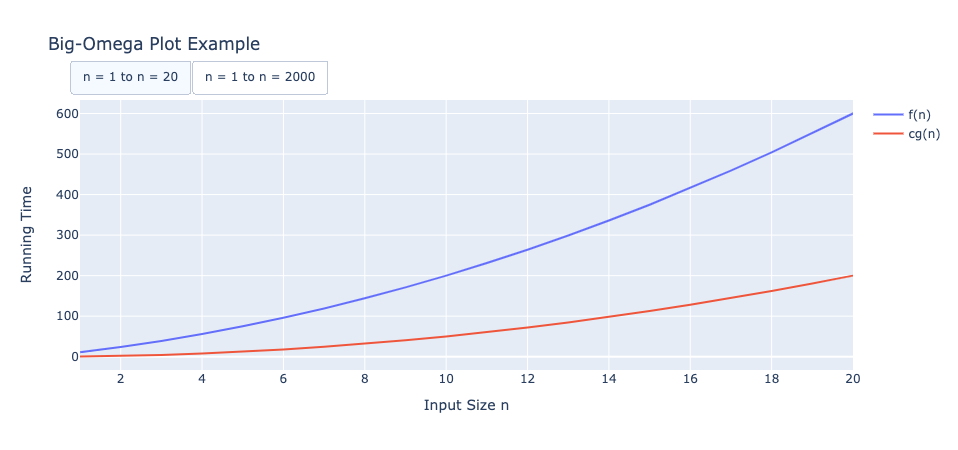

In [3]:
# Increase 21 to 2001 to show that f(n) is still greater than or equal to cg(n) for larger values of n
n1 = np.arange(1, 21, 1)
n2 = np.arange(1, 2001, 1) 

big_omega_dict_using_n1= {
    'f(n)': n1**2 + 10*n1,
    'cg(n)': .5*n1**2,
}

big_omega_dict_using_n2= {
    'f(n)': n2**2 + 10*n2,
    'cg(n)': .5*n2**2,
}

labels = list(big_omega_dict_using_n1.keys())
n1_functions = list(big_omega_dict_using_n1.values())

n2_functions = list(big_omega_dict_using_n2.values())

n1_initialVisibility = [True, True]
n2_initialVisibility = [False, False]

# Create figure
fig = go.Figure()
    
for i in range(len(labels)):
    fig.add_trace(go.Scatter(x=n1, y=n1_functions[i], name=labels[i], visible=n1_initialVisibility[i], mode="lines"))
    fig.add_trace(go.Scatter(x=n2, y=n2_functions[i], name=labels[i], visible=n2_initialVisibility[i], mode="lines"))
              
fig.update_layout(
    title_text="Big-Omega Plot Example",
    xaxis=dict(title="Input Size n"),
    yaxis=dict(title="Running Time")
)

fig.layout.update(
   updatemenus = [
      go.layout.Updatemenu(
         type = "buttons", direction = "right", active = 0, x = 0.32, y = 1.15,
         buttons = list(
            [
               dict(
                  label = "n = 1 to n = 20", method = "restyle",
                  args = [{"visible": [True, False, True, False]}]
               ),
               dict(
                  label = "n = 1 to n = 2000", method = "restyle", 
                  args = [{"visible": [False, True, False, True]}]
               ),
            ]
         )
      )
   ]
)

fig.show()

* The above example illustrates the Big-$\Omega$ notation. The function $f(n)$ is $\Omega(g(n))$, since $f(n) \geq c \cdot g(n)$ for all $n \geq n_0$

* As long as we can find a $c$ that prevents $g(n)$ from overcoming $f(n)$ then we have found a $g(n)$ capable of modeling the correct behavior.

* Also by the way we could just choose $g(n)=1$, but again we would like to be more accurate in our analysis.

## Big-$ \Theta $

Let $f(n)$ and $g(n)$ be functions mapping positive integers to positive real numbers.

We say $f(n)$ $\epsilon$ $\Theta(g(n))$ if there are a real constants $c' > 0$ and $c'' > 0$ and an integer constant $n_0 \geq 1$ such that:

$c'g(n) \leq f(n) \leq c''g(n)$, for all $n \geq n_0$

Remember Big-$\Theta$ refers to an ***UPPER BOUND*** & ***LOWER BOUND***

### Big-$\Theta$ Plot Example

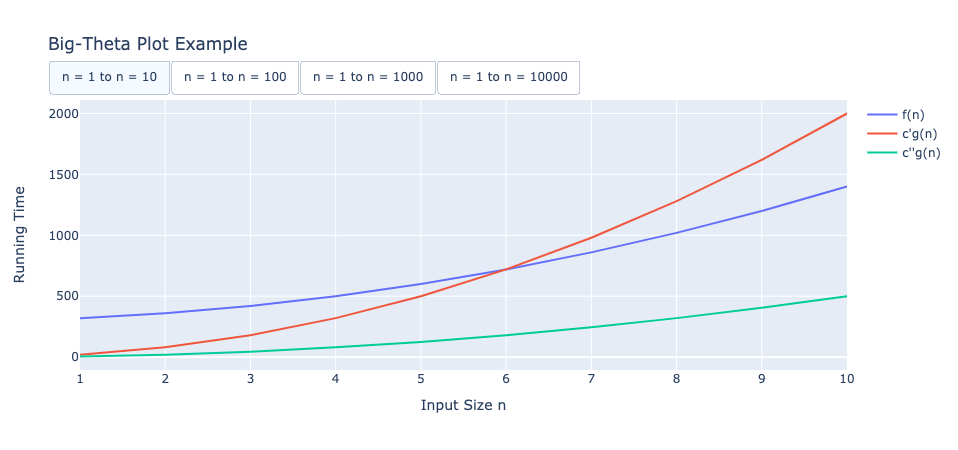

In [4]:
# Increase 11 to 101, 1001, 10,001 to show that f(n) is still bounded
n1 = np.arange(1, 11, 1)
n2 = np.arange(1, 101, 1)
n3 = np.arange(1, 1001, 1)
n4 = np.arange(1, 10001, 1)

big_theta_dict_using_n1= {
    'f(n)': 10*n1**2 + 10*n1 + 300,
    'c\'g(n)': 20*n1**2,
    'c\'\'g(n)': 5*n1**2,
}

big_theta_dict_using_n2= {
    'f(n)': 10*n2**2 + 10*n2 + 300,
    'c\'g(n)': 20*n2**2,
    'c\'\'g(n)': 5*n2**2,
}

big_theta_dict_using_n3= {
    'f(n)': 10*n3**2 + 10*n3 + 300,
    'c\'g(n)': 20*n3**2,
    'c\'\'g(n)': 5*n3**2,
}

big_theta_dict_using_n4= {
    'f(n)': 10*n4**2 + 10*n4 + 300,
    'c\'g(n)': 20*n4**2,
    'c\'\'g(n)': 5*n4**2,
}

labels = list(big_theta_dict_using_n1.keys())
n1_functions = list(big_theta_dict_using_n1.values())

n2_functions = list(big_theta_dict_using_n2.values())

n3_functions = list(big_theta_dict_using_n3.values())

n4_functions = list(big_theta_dict_using_n4.values())

n1_initialVisibility = [True, True, True]
n2_initialVisibility = [False, False, False]
n3_initialVisibility = [False, False, False]
n4_initialVisibility = [False, False, False]

# Create figure
fig = go.Figure()
    
for i in range(len(labels)):
    fig.add_trace(go.Scatter(x=n1, y=n1_functions[i], name=labels[i], visible=n1_initialVisibility[i], mode="lines"))
    fig.add_trace(go.Scatter(x=n2, y=n2_functions[i], name=labels[i], visible=n2_initialVisibility[i], mode="lines"))
    fig.add_trace(go.Scatter(x=n3, y=n3_functions[i], name=labels[i], visible=n3_initialVisibility[i], mode="lines"))
    fig.add_trace(go.Scatter(x=n4, y=n4_functions[i], name=labels[i], visible=n4_initialVisibility[i], mode="lines"))
              
fig.update_layout(
    title_text="Big-Theta Plot Example",
    xaxis=dict(title="Input Size n"),
    yaxis=dict(title="Running Time")
)

fig.layout.update(
   updatemenus = [
      go.layout.Updatemenu(
         type = "buttons", direction = "right", active = 0, x = 0.65, y = 1.15,
         buttons = list(
            [
               dict(
                  label = "n = 1 to n = 10", method = "restyle",
                  args = [{"visible": [True, False, False, False, True, False, False, False, True, False, False, False]}]
               ),
               dict(
                  label = "n = 1 to n = 100", method = "restyle", 
                  args = [{"visible": [False, True, False, False, False, True, False, False, False, True, False, False]}]
               ),
               dict(
                  label = "n = 1 to n = 1000", method = "restyle",
                  args = [{"visible": [False, False, True, False, False, False, True, False, False, False, True, False]}]
               ),
               dict(
                  label = "n = 1 to n = 10000", method = "restyle", 
                  args = [{"visible": [False, False, False, True, False, False, False, True, False, False, False, True]}]
               )
            ]
         )
      )
   ]
)

fig.show()